In [883]:
# general and data handling
import numpy as np
import pandas as pd
import os
from collections import Counter
# Required RDKit modules
import rdkit as rd
from rdkit.Chem.Fingerprints import FingerprintMols
from rdkit import RDConfig
from rdkit.Chem import PandasTools
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import rdFingerprintGenerator
from rdkit import DataStructs
from rdkit.Chem import AllChem as Chem
from rdkit.Chem.rdMolDescriptors import GetAtomPairFingerprint
from rdkit.Chem.AtomPairs import Torsions
# modeling
import sklearn as sk
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import validation_curve
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from imblearn.over_sampling import ADASYN
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
# Graphing
import matplotlib.pyplot as plt
import seaborn as sns
import csv
#from tabulate import tabulate
from sklearn.metrics import average_precision_score
from sklearn.metrics import recall_score
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics
#from tabulate import tabulate
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score
#import shap
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt 
from xgboost import plot_importance
from rdkit.Chem import Draw

import shap
#from rdkit import Chem
#from rdkit.Chem import rdMolDescriptors
#from rdkit.Chem.Draw import IPythonConsole
#from rdkit.Chem import Draw
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix


from rdkit.Chem import Descriptors
from rdkit.ML.Descriptors import MoleculeDescriptors

from sklearn.preprocessing import StandardScaler

from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import f1_score

import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.utils.class_weight import compute_sample_weight


from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
#from datatime import datetime
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings('ignore')


In [884]:
fd_m2= pd.read_csv("../../input_data_base_model/final_input_data_m.csv",delimiter=",",index_col=0)

In [885]:
fda_test = pd.read_csv("../../input_data_base_model/FDA_test_data_m.csv",delimiter=",",index_col=0)

In [886]:
fda_test

MaxEStateIndex  \
1-(2-Phenylethyl)-4-phenyl-4-acetoxypiperidine       11.646914   
1-Androstenediol                                     10.458205   
1-Phenylcyclohexylamine                               6.380370   
1-Piperidinocyclohexanecarbonitrile                   9.402115   
17Alpha-methyl-3beta                                 10.937468   
...                                                        ...   
Valproic_acid                                        10.479352   
Water                                                 0.000000   
Zileuton                                             10.832023   
Zoledronic_acid                                      10.944576   
Zonisamide                                           10.838410   

                                                MinEStateIndex  \
1-(2-Phenylethyl)-4-phenyl-4-acetoxypiperidine       -0.461964   
1-Androstenediol                                     -0.220570   
1-Phenylcyclohexylamine                              -0.028264   
1-Piperidinocyclohexanecarbonitrile                  -0.070764   
17Alpha-methyl-3beta                                 -0.455209   
...                                                        ...   
Valproic_acid                                        -0.635463   
Water                                                 0.000000   
Zileuton                                             -0.842633   
Zoledronic_acid                                      -5.406512   
Zonisamide                                           -3.561044   

                                                MinAbsEStateIndex       qed  \
1-(2-Phenylethyl)-4-phenyl-4-acetoxypiperidine           0.197603  0.784296   
1-Androstenediol                                         0.071574  0.670093   
1-Phenylcyclohexylamine                                  0.028264  0.697498   
1-Piperidinocyclohexanecarbonitrile                      0.070764  0.638407   
17Alpha-methyl-3beta                                     0.045653  0.705878   
...                                                           ...       ...   
Valproic_acid                                            0.101852  0.642372   
Water                                                    0.000000  0.327748   
Zileuton                                                 0.421389  0.621568   
Zoledronic_acid                                          0.956528  0.431964   
Zonisamide                                               0.301574  0.789958   

                                                  MolWt  NumRadicalElectrons  \
1-(2-Phenylethyl)-4-phenyl-4-acetoxypiperidine  323.436                  0.0   
1-Androstenediol                                290.447                  0.0   
1-Phenylcyclohexylamine                         175.275                  0.0   
1-Piperidinocyclohexanecarbonitrile             192.306                  0.0   
17Alpha-methyl-3beta                            306.490                  0.0   
...                                                 ...                  ...   
Valproic_acid                                   144.214                  0.0   
Water                                            18.015                  0.0   
Zileuton                                        236.296                  0.0   
Zoledronic_acid                                 272.090                  0.0   
Zonisamide                                      212.230                  0.0   

                                                MaxPartialCharge  \
1-(2-Phenylethyl)-4-phenyl-4-acetoxypiperidine          0.303020   
1-Androstenediol                                        0.072362   
1-Phenylcyclohexylamine                                 0.040917   
1-Piperidinocyclohexanecarbonitrile                     0.108749   
17Alpha-methyl-3beta                                    0.067547   
...                                                          ...   
Valproic_acid                                           0.305987   
Water   

In [887]:
fd_m2

Bacteroides_caccae_ATCC43185  Escherichia_coli__K-12  \
Acebutolol                           0.000                   0.000   
Alfuzosin                            0.000                   1.211   
Almotriptan                          0.000                   3.870   
Alprenolol                           0.000                   6.336   
Amantadine                           0.000                   3.282   
...                                    ...                     ...   
Vinpocetine                          0.000                  11.041   
Voriconazole                         1.503                   0.000   
Warfarin                             0.156                   0.000   
Zaleplon                             4.757                  10.008   
Zolpidem                             3.193                   2.123   

              Clostridium_ramosum_DSM1402  \
Acebutolol                          0.000   
Alfuzosin                           0.000   
Almotriptan                         0.000   
Alprenolol                          7.055   
Amantadine                          0.805   
...                                   ...   
Vinpocetine                         0.000   
Voriconazole                        2.507   
Warfarin                            0.000   
Zaleplon                           11.967   
Zolpidem                            0.000   

              Bifidobacterium_adolescentis_ATCC15703  \
Acebutolol                                     0.000   
Alfuzosin                                      0.000   
Almotriptan                                    0.000   
Alprenolol                                     0.000   
Amantadine                                     0.000   
...                                              ...   
Vinpocetine                                    0.000   
Voriconazole                                   0.000   
Warfarin                                       0.000   
Zaleplon                                       5.518   
Zolpidem                                       0.000   

              Bacteroides_eggerthii_DSM20697  Blautia_hansenii_DSM20583  \
Acebutolol                             0.000                      4.871   
Alfuzosin                              0.000                     10.240   
Almotriptan                            0.000                      6.121   
Alprenolol                             0.000                     18.722   
Amantadine                             0.000                     14.318   
...                                      ...                        ...   
Vinpocetine                            0.000                     26.406   
Voriconazole                          14.783                     20.815   
Warfarin                               2.452                      9.108   
Zaleplon                              17.354                     26.699   
Zolpidem                              79.440                     13.599   

              Clostridium_sp.  Ruminococcus_gnavus_ATCC29149  \
Acebutolol              3.227                            0.0   
Alfuzosin              16.296                            0.0   
Almotriptan            10.913                            0.0   
Alprenolol             15.612                            0.0   
Amantadine             16.017                            0.0   
...                       ...                            ...   
Vinpocetine            28.811                            0.0   
Voriconazole           18.847                            0.0   
Warfarin                1.353                            0.0   
Zaleplon               26.187                            0.0   
Zolpidem               14.720                            0.0   

              Bacteroides_dorei_DSM17855  \
Acebutolol                        14.440   
Alfuzosin                         20.946   
Almotriptan                        8.747   
Alprenolol                        11.794   
Amantadine                         0.000   
...                      

In [888]:
df15_m=fd_m2.iloc[:,0:74]

In [889]:
df15_m

Bacteroides_caccae_ATCC43185  Escherichia_coli__K-12  \
Acebutolol                           0.000                   0.000   
Alfuzosin                            0.000                   1.211   
Almotriptan                          0.000                   3.870   
Alprenolol                           0.000                   6.336   
Amantadine                           0.000                   3.282   
...                                    ...                     ...   
Vinpocetine                          0.000                  11.041   
Voriconazole                         1.503                   0.000   
Warfarin                             0.156                   0.000   
Zaleplon                             4.757                  10.008   
Zolpidem                             3.193                   2.123   

              Clostridium_ramosum_DSM1402  \
Acebutolol                          0.000   
Alfuzosin                           0.000   
Almotriptan                         0.000   
Alprenolol                          7.055   
Amantadine                          0.805   
...                                   ...   
Vinpocetine                         0.000   
Voriconazole                        2.507   
Warfarin                            0.000   
Zaleplon                           11.967   
Zolpidem                            0.000   

              Bifidobacterium_adolescentis_ATCC15703  \
Acebutolol                                     0.000   
Alfuzosin                                      0.000   
Almotriptan                                    0.000   
Alprenolol                                     0.000   
Amantadine                                     0.000   
...                                              ...   
Vinpocetine                                    0.000   
Voriconazole                                   0.000   
Warfarin                                       0.000   
Zaleplon                                       5.518   
Zolpidem                                       0.000   

              Bacteroides_eggerthii_DSM20697  Blautia_hansenii_DSM20583  \
Acebutolol                             0.000                      4.871   
Alfuzosin                              0.000                     10.240   
Almotriptan                            0.000                      6.121   
Alprenolol                             0.000                     18.722   
Amantadine                             0.000                     14.318   
...                                      ...                        ...   
Vinpocetine                            0.000                     26.406   
Voriconazole                          14.783                     20.815   
Warfarin                               2.452                      9.108   
Zaleplon                              17.354                     26.699   
Zolpidem                              79.440                     13.599   

              Clostridium_sp.  Ruminococcus_gnavus_ATCC29149  \
Acebutolol              3.227                            0.0   
Alfuzosin              16.296                            0.0   
Almotriptan            10.913                            0.0   
Alprenolol             15.612                            0.0   
Amantadine             16.017                            0.0   
...                       ...                            ...   
Vinpocetine            28.811                            0.0   
Voriconazole           18.847                            0.0   
Warfarin                1.353                            0.0   
Zaleplon               26.187                            0.0   
Zolpidem               14.720                            0.0   

              Bacteroides_dorei_DSM17855  \
Acebutolol                        14.440   
Alfuzosin                         20.946   
Almotriptan                        8.747   
Alprenolol                        11.794   
Amantadine                         0.000   
...                      

In [890]:
test_da=fda_test.iloc[:,0:-1]

/home/himanshu/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/himanshu/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/himanshu/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/home/himanshu/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 349, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: continuous format is not supported

  warnings.warn(
/home/himanshu/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-te

0.7239583333333335 1.0


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
NPY_ARRAY_UPDATEIFCOPY, NPY_ARRAY_INOUT_ARRAY, and NPY_ARRAY_INOUT_FARRAY are deprecated, use NPY_WRITEBACKIFCOPY, NPY_ARRAY_INOUT_ARRAY2, or NPY_ARRAY_INOUT_FARRAY2 respectively instead, and call PyArray_ResolveWritebackIfCopy before the array is deallocated, i.e. before the last call to Py_DECREF.
UPDATEIFCOPY detected in array_dealloc.  Required call to PyArray_ResolveWritebackIfCopy or PyArray_DiscardWritebackIfCopy is missing
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
/home/himanshu/ana

0.8308823529411764 1.0


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
NPY_ARRAY_UPDATEIFCOPY, NPY_ARRAY_INOUT_ARRAY, and NPY_ARRAY_INOUT_FARRAY are deprecated, use NPY_WRITEBACKIFCOPY, NPY_ARRAY_INOUT_ARRAY2, or NPY_ARRAY_INOUT_FARRAY2 respectively instead, and call PyArray_ResolveWritebackIfCopy before the array is deallocated, i.e. before the last call to Py_DECREF.
UPDATEIFCOPY detected in array_dealloc.  Required call to PyArray_ResolveWritebackIfCopy or PyArray_DiscardWritebackIfCopy is missing
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
/home/himanshu/ana

0.7105263157894737 1.0


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
NPY_ARRAY_UPDATEIFCOPY, NPY_ARRAY_INOUT_ARRAY, and NPY_ARRAY_INOUT_FARRAY are deprecated, use NPY_WRITEBACKIFCOPY, NPY_ARRAY_INOUT_ARRAY2, or NPY_ARRAY_INOUT_FARRAY2 respectively instead, and call PyArray_ResolveWritebackIfCopy before the array is deallocated, i.e. before the last call to Py_DECREF.
UPDATEIFCOPY detected in array_dealloc.  Required call to PyArray_ResolveWritebackIfCopy or PyArray_DiscardWritebackIfCopy is missing
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
/home/himanshu/ana

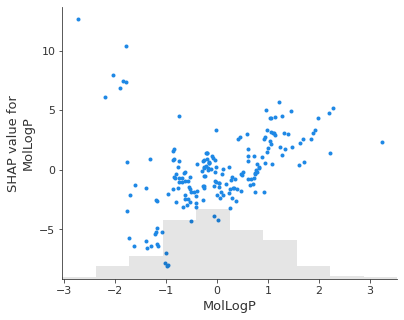

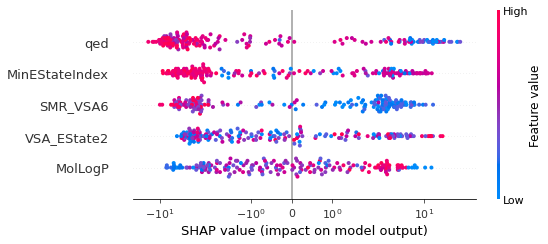

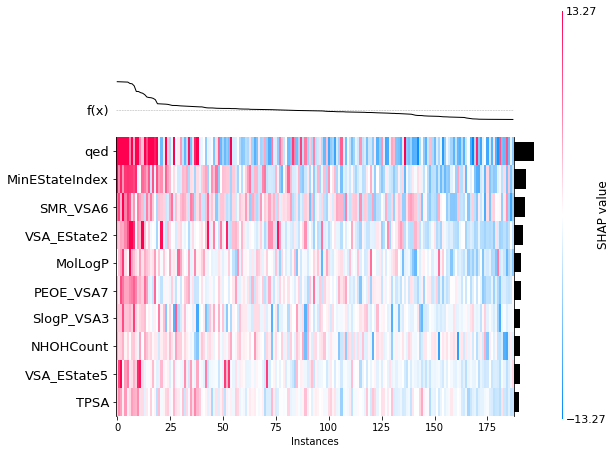

/home/himanshu/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/himanshu/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/himanshu/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/home/himanshu/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 349, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: continuous format is not supported

  warnings.warn(
/home/himanshu/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-te

0.6607142857142857 1.0


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
/home/himanshu/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/himanshu/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/himanshu/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/home/himanshu/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 349, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: continuous format is not supported

  warnings.warn(
/home/himanshu/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/model_selection/

0.6932773109243697 1.0


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
NPY_ARRAY_UPDATEIFCOPY, NPY_ARRAY_INOUT_ARRAY, and NPY_ARRAY_INOUT_FARRAY are deprecated, use NPY_WRITEBACKIFCOPY, NPY_ARRAY_INOUT_ARRAY2, or NPY_ARRAY_INOUT_FARRAY2 respectively instead, and call PyArray_ResolveWritebackIfCopy before the array is deallocated, i.e. before the last call to Py_DECREF.
UPDATEIFCOPY detected in array_dealloc.  Required call to PyArray_ResolveWritebackIfCopy or PyArray_DiscardWritebackIfCopy is missing
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
/home/himanshu/ana

0.7720588235294117 1.0


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
NPY_ARRAY_UPDATEIFCOPY, NPY_ARRAY_INOUT_ARRAY, and NPY_ARRAY_INOUT_FARRAY are deprecated, use NPY_WRITEBACKIFCOPY, NPY_ARRAY_INOUT_ARRAY2, or NPY_ARRAY_INOUT_FARRAY2 respectively instead, and call PyArray_ResolveWritebackIfCopy before the array is deallocated, i.e. before the last call to Py_DECREF.
UPDATEIFCOPY detected in array_dealloc.  Required call to PyArray_ResolveWritebackIfCopy or PyArray_DiscardWritebackIfCopy is missing
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
/home/himanshu/ana

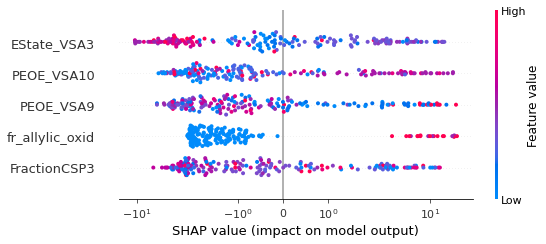

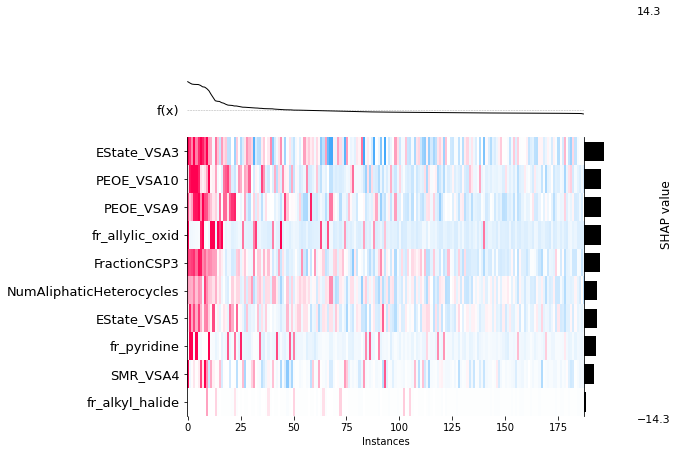

/home/himanshu/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/himanshu/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/himanshu/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/home/himanshu/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 349, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: continuous format is not supported

  warnings.warn(
/home/himanshu/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-te

0.6666666666666667 0.9583333333333333


NPY_ARRAY_UPDATEIFCOPY, NPY_ARRAY_INOUT_ARRAY, and NPY_ARRAY_INOUT_FARRAY are deprecated, use NPY_WRITEBACKIFCOPY, NPY_ARRAY_INOUT_ARRAY2, or NPY_ARRAY_INOUT_FARRAY2 respectively instead, and call PyArray_ResolveWritebackIfCopy before the array is deallocated, i.e. before the last call to Py_DECREF.
UPDATEIFCOPY detected in array_dealloc.  Required call to PyArray_ResolveWritebackIfCopy or PyArray_DiscardWritebackIfCopy is missing
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
/home/himanshu/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/himanshu/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/himanshu/anaconda3/envs/py39/lib/pyt

0.6927536231884059 1.0


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
/home/himanshu/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/himanshu/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/himanshu/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/home/himanshu/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 349, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: continuous format is not supported

  warnings.warn(
/home/himanshu/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/model_selection/

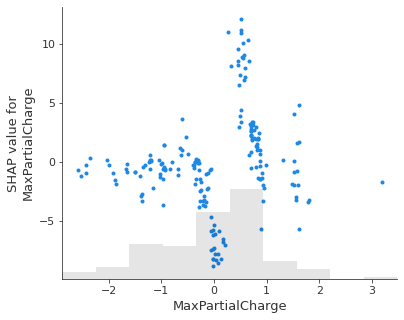

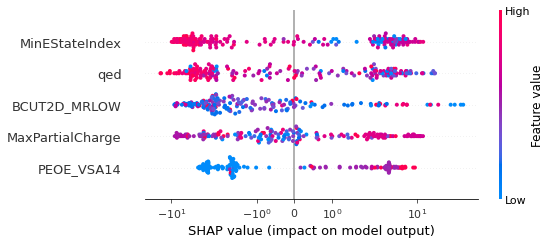

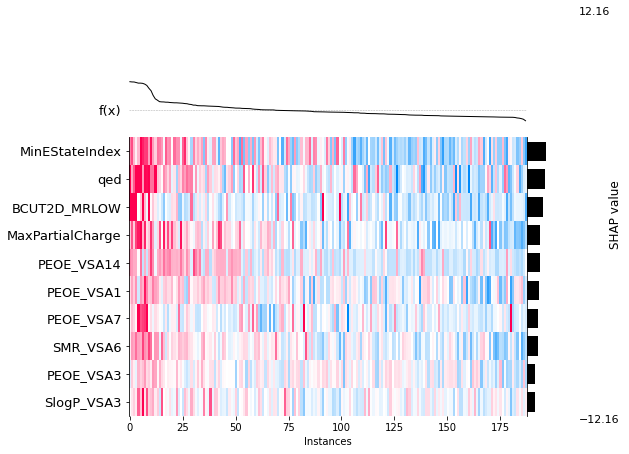

/home/himanshu/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/himanshu/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/himanshu/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/home/himanshu/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 349, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: continuous format is not supported

  warnings.warn(
/home/himanshu/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-te

0.8020833333333334 1.0


/home/himanshu/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/himanshu/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/himanshu/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/home/himanshu/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 349, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: continuous format is not supported

  warnings.warn(
/home/himanshu/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-te

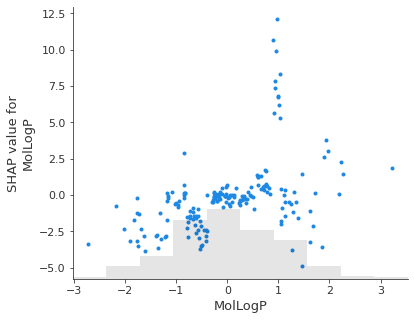

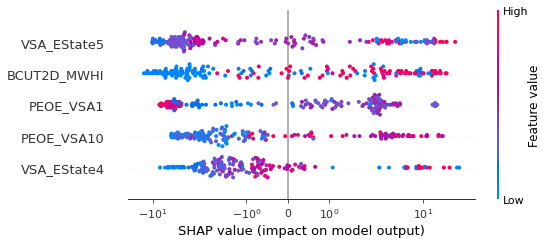

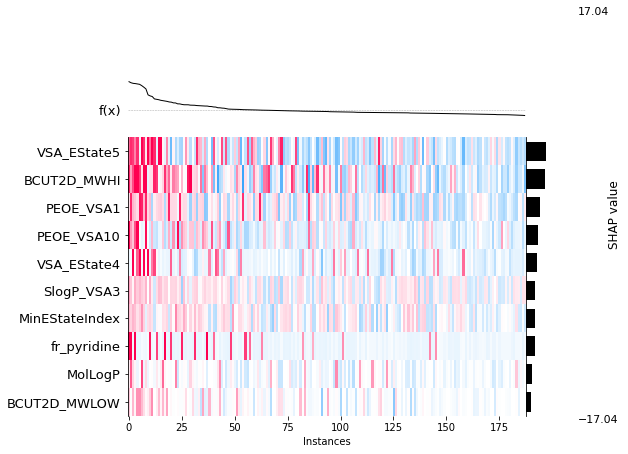

/home/himanshu/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/himanshu/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/himanshu/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/home/himanshu/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 349, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: continuous format is not supported

  warnings.warn(
/home/himanshu/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-te

0.7083333333333334 1.0


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
/home/himanshu/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/himanshu/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/himanshu/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/home/himanshu/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 349, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: continuous format is not supported

  warnings.warn(
/home/himanshu/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/model_selection/

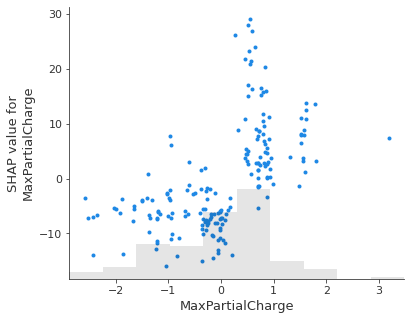

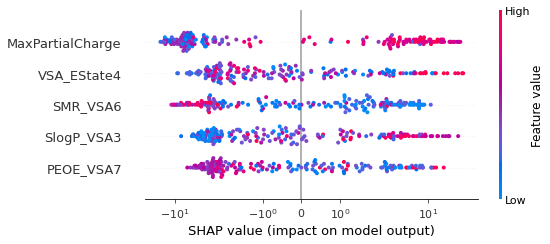

/home/himanshu/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/himanshu/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/himanshu/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/home/himanshu/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 349, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: continuous format is not supported

  warnings.warn(
/home/himanshu/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-te

0.7611111111111112 0.9943820224719101


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
NPY_ARRAY_UPDATEIFCOPY, NPY_ARRAY_INOUT_ARRAY, and NPY_ARRAY_INOUT_FARRAY are deprecated, use NPY_WRITEBACKIFCOPY, NPY_ARRAY_INOUT_ARRAY2, or NPY_ARRAY_INOUT_FARRAY2 respectively instead, and call PyArray_ResolveWritebackIfCopy before the array is deallocated, i.e. before the last call to Py_DECREF.
UPDATEIFCOPY detected in array_dealloc.  Required call to PyArray_ResolveWritebackIfCopy or PyArray_DiscardWritebackIfCopy is missing
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
/home/himanshu/ana

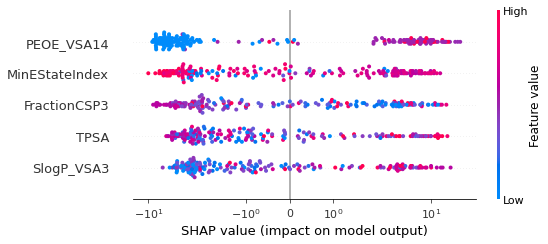

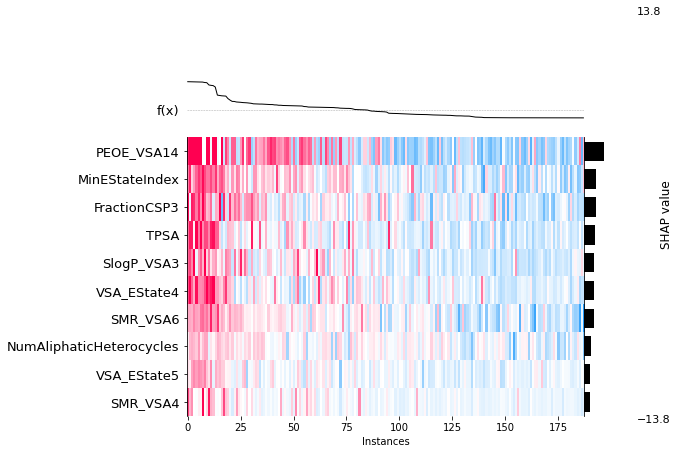

/home/himanshu/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/himanshu/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/himanshu/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/home/himanshu/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 349, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: continuous format is not supported

  warnings.warn(
/home/himanshu/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-te

0.6749999999999999 0.9589285714285714


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
NPY_ARRAY_UPDATEIFCOPY, NPY_ARRAY_INOUT_ARRAY, and NPY_ARRAY_INOUT_FARRAY are deprecated, use NPY_WRITEBACKIFCOPY, NPY_ARRAY_INOUT_ARRAY2, or NPY_ARRAY_INOUT_FARRAY2 respectively instead, and call PyArray_ResolveWritebackIfCopy before the array is deallocated, i.e. before the last call to Py_DECREF.
UPDATEIFCOPY detected in array_dealloc.  Required call to PyArray_ResolveWritebackIfCopy or PyArray_DiscardWritebackIfCopy is missing
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
/home/himanshu/ana

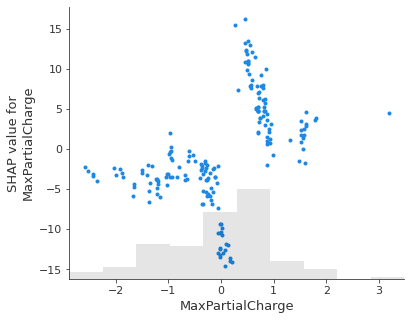

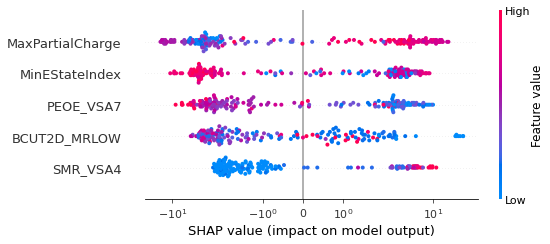

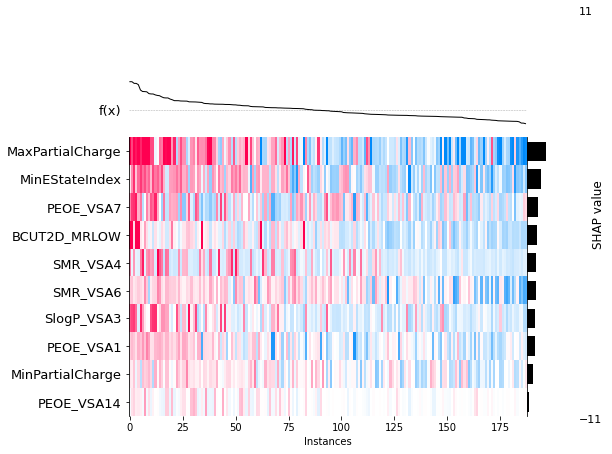

/home/himanshu/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/himanshu/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/himanshu/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/home/himanshu/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 349, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: continuous format is not supported

  warnings.warn(
/home/himanshu/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-te

0.6538461538461539 1.0


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
NPY_ARRAY_UPDATEIFCOPY, NPY_ARRAY_INOUT_ARRAY, and NPY_ARRAY_INOUT_FARRAY are deprecated, use NPY_WRITEBACKIFCOPY, NPY_ARRAY_INOUT_ARRAY2, or NPY_ARRAY_INOUT_FARRAY2 respectively instead, and call PyArray_ResolveWritebackIfCopy before the array is deallocated, i.e. before the last call to Py_DECREF.
UPDATEIFCOPY detected in array_dealloc.  Required call to PyArray_ResolveWritebackIfCopy or PyArray_DiscardWritebackIfCopy is missing
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
/home/himanshu/ana

0.6875 1.0


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
NPY_ARRAY_UPDATEIFCOPY, NPY_ARRAY_INOUT_ARRAY, and NPY_ARRAY_INOUT_FARRAY are deprecated, use NPY_WRITEBACKIFCOPY, NPY_ARRAY_INOUT_ARRAY2, or NPY_ARRAY_INOUT_FARRAY2 respectively instead, and call PyArray_ResolveWritebackIfCopy before the array is deallocated, i.e. before the last call to Py_DECREF.
UPDATEIFCOPY detected in array_dealloc.  Required call to PyArray_ResolveWritebackIfCopy or PyArray_DiscardWritebackIfCopy is missing
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
/home/himanshu/ana

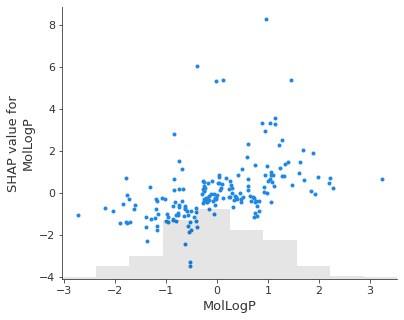

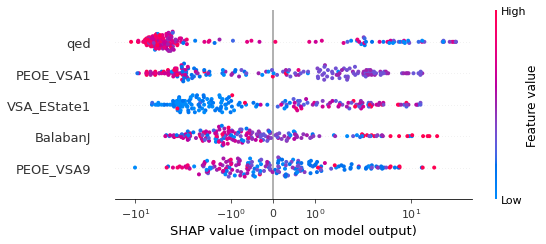

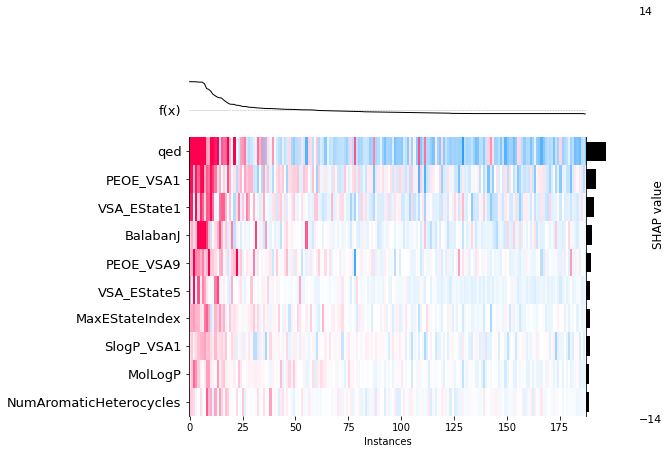

/home/himanshu/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/himanshu/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/himanshu/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/home/himanshu/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 349, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: continuous format is not supported

  warnings.warn(
/home/himanshu/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-te

0.669467787114846 0.9804079441760601


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
NPY_ARRAY_UPDATEIFCOPY, NPY_ARRAY_INOUT_ARRAY, and NPY_ARRAY_INOUT_FARRAY are deprecated, use NPY_WRITEBACKIFCOPY, NPY_ARRAY_INOUT_ARRAY2, or NPY_ARRAY_INOUT_FARRAY2 respectively instead, and call PyArray_ResolveWritebackIfCopy before the array is deallocated, i.e. before the last call to Py_DECREF.
UPDATEIFCOPY detected in array_dealloc.  Required call to PyArray_ResolveWritebackIfCopy or PyArray_DiscardWritebackIfCopy is missing
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
/home/himanshu/ana

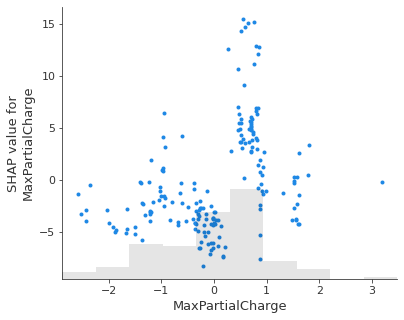

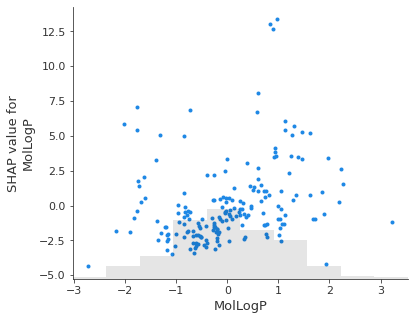

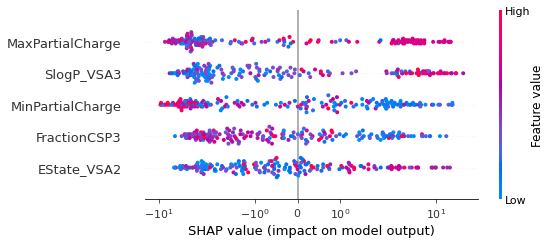

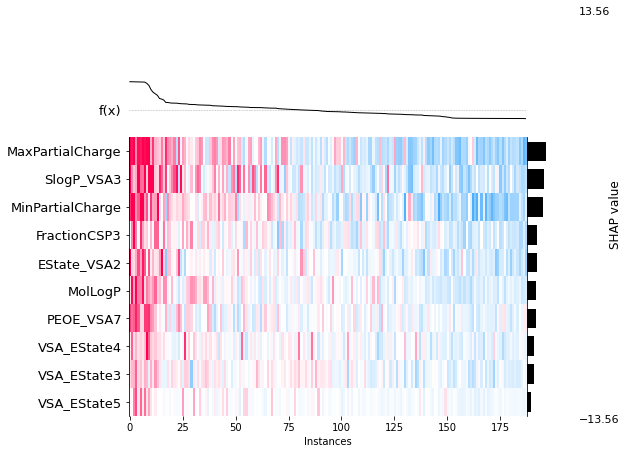

/home/himanshu/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/himanshu/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/himanshu/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/home/himanshu/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 349, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: continuous format is not supported

  warnings.warn(
/home/himanshu/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-te

0.7395833333333334 0.9961832061068703


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
/home/himanshu/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/himanshu/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/himanshu/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/home/himanshu/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 349, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: continuous format is not supported

  warnings.warn(
/home/himanshu/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/model_selection/

0.6545454545454545 0.8620689655172413


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
/home/himanshu/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/himanshu/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/himanshu/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/home/himanshu/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 349, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: continuous format is not supported

  warnings.warn(
/home/himanshu/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/model_selection/

0.657051282051282 1.0


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
NPY_ARRAY_UPDATEIFCOPY, NPY_ARRAY_INOUT_ARRAY, and NPY_ARRAY_INOUT_FARRAY are deprecated, use NPY_WRITEBACKIFCOPY, NPY_ARRAY_INOUT_ARRAY2, or NPY_ARRAY_INOUT_FARRAY2 respectively instead, and call PyArray_ResolveWritebackIfCopy before the array is deallocated, i.e. before the last call to Py_DECREF.
UPDATEIFCOPY detected in array_dealloc.  Required call to PyArray_ResolveWritebackIfCopy or PyArray_DiscardWritebackIfCopy is missing
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
/home/himanshu/ana

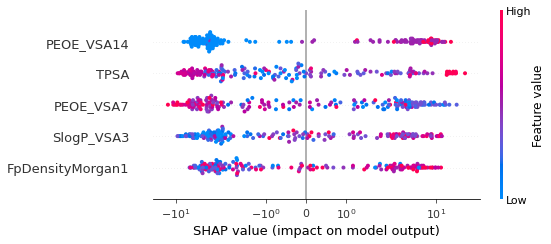

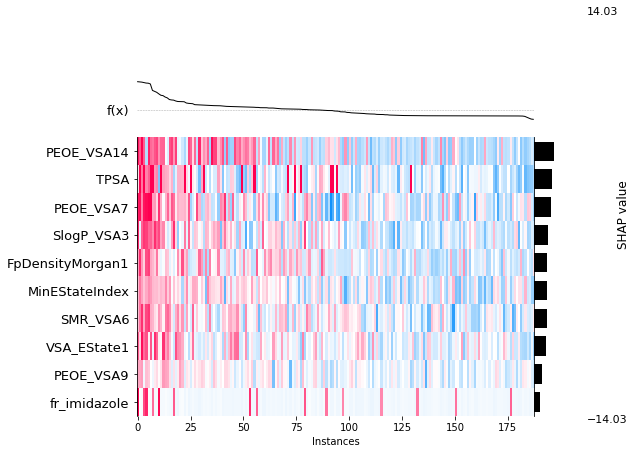

/home/himanshu/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/himanshu/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/himanshu/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/home/himanshu/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 349, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: continuous format is not supported

  warnings.warn(
/home/himanshu/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-te

0.736842105263158 1.0


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
NPY_ARRAY_UPDATEIFCOPY, NPY_ARRAY_INOUT_ARRAY, and NPY_ARRAY_INOUT_FARRAY are deprecated, use NPY_WRITEBACKIFCOPY, NPY_ARRAY_INOUT_ARRAY2, or NPY_ARRAY_INOUT_FARRAY2 respectively instead, and call PyArray_ResolveWritebackIfCopy before the array is deallocated, i.e. before the last call to Py_DECREF.
UPDATEIFCOPY detected in array_dealloc.  Required call to PyArray_ResolveWritebackIfCopy or PyArray_DiscardWritebackIfCopy is missing
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
/home/himanshu/ana

0.6875 1.0


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
NPY_ARRAY_UPDATEIFCOPY, NPY_ARRAY_INOUT_ARRAY, and NPY_ARRAY_INOUT_FARRAY are deprecated, use NPY_WRITEBACKIFCOPY, NPY_ARRAY_INOUT_ARRAY2, or NPY_ARRAY_INOUT_FARRAY2 respectively instead, and call PyArray_ResolveWritebackIfCopy before the array is deallocated, i.e. before the last call to Py_DECREF.
UPDATEIFCOPY detected in array_dealloc.  Required call to PyArray_ResolveWritebackIfCopy or PyArray_DiscardWritebackIfCopy is missing
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
/home/himanshu/ana

0.6988636363636364 1.0


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
NPY_ARRAY_UPDATEIFCOPY, NPY_ARRAY_INOUT_ARRAY, and NPY_ARRAY_INOUT_FARRAY are deprecated, use NPY_WRITEBACKIFCOPY, NPY_ARRAY_INOUT_ARRAY2, or NPY_ARRAY_INOUT_FARRAY2 respectively instead, and call PyArray_ResolveWritebackIfCopy before the array is deallocated, i.e. before the last call to Py_DECREF.
UPDATEIFCOPY detected in array_dealloc.  Required call to PyArray_ResolveWritebackIfCopy or PyArray_DiscardWritebackIfCopy is missing
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
/home/himanshu/ana

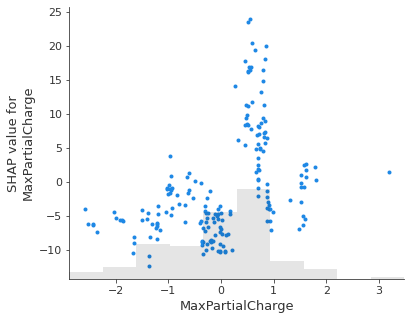

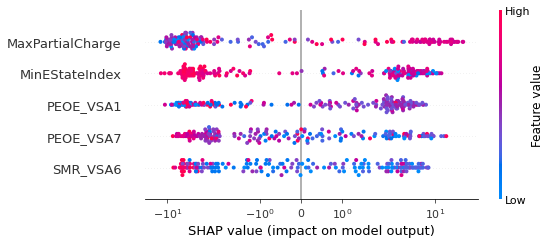

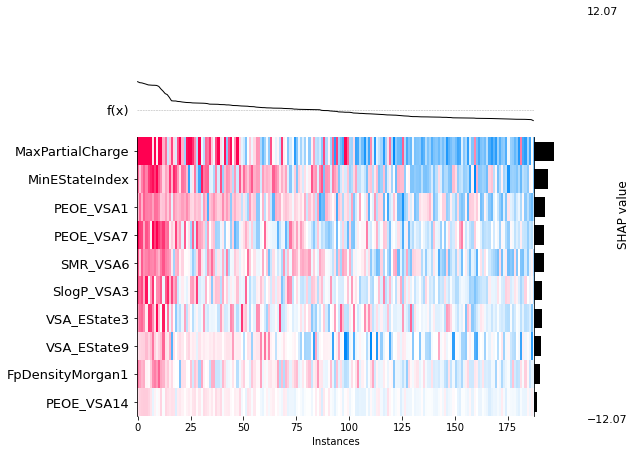

/home/himanshu/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/himanshu/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/himanshu/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/home/himanshu/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 349, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: continuous format is not supported

  warnings.warn(
/home/himanshu/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-te

0.7305555555555556 1.0


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
NPY_ARRAY_UPDATEIFCOPY, NPY_ARRAY_INOUT_ARRAY, and NPY_ARRAY_INOUT_FARRAY are deprecated, use NPY_WRITEBACKIFCOPY, NPY_ARRAY_INOUT_ARRAY2, or NPY_ARRAY_INOUT_FARRAY2 respectively instead, and call PyArray_ResolveWritebackIfCopy before the array is deallocated, i.e. before the last call to Py_DECREF.
UPDATEIFCOPY detected in array_dealloc.  Required call to PyArray_ResolveWritebackIfCopy or PyArray_DiscardWritebackIfCopy is missing
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
/home/himanshu/ana

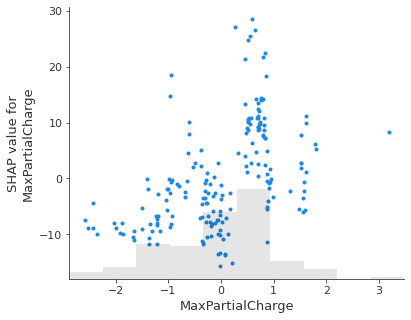

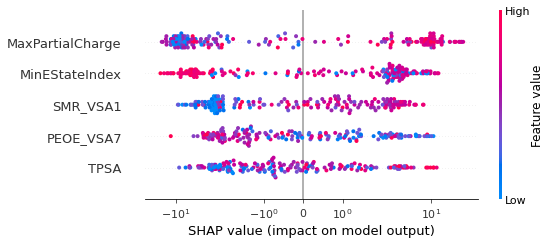

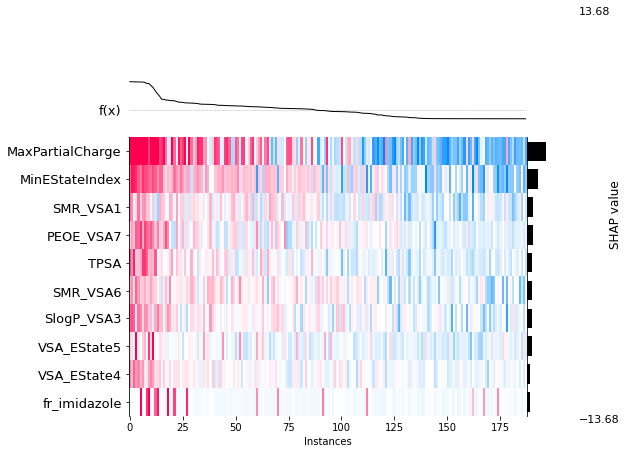

/home/himanshu/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/himanshu/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/himanshu/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/home/himanshu/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 349, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: continuous format is not supported

  warnings.warn(
/home/himanshu/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-te

0.669467787114846 1.0


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
NPY_ARRAY_UPDATEIFCOPY, NPY_ARRAY_INOUT_ARRAY, and NPY_ARRAY_INOUT_FARRAY are deprecated, use NPY_WRITEBACKIFCOPY, NPY_ARRAY_INOUT_ARRAY2, or NPY_ARRAY_INOUT_FARRAY2 respectively instead, and call PyArray_ResolveWritebackIfCopy before the array is deallocated, i.e. before the last call to Py_DECREF.
UPDATEIFCOPY detected in array_dealloc.  Required call to PyArray_ResolveWritebackIfCopy or PyArray_DiscardWritebackIfCopy is missing
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
/home/himanshu/ana

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.3,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0.0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.2, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=11, max_leaves=0, min_child_weight=3,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [891]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
# import model and matrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RepeatedStratifiedKFold, StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix,roc_curve, roc_auc_score, precision_score, recall_score, precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import cohen_kappa_score
cols_m=[col for col in df15_m.columns]
w = open("out_file_wc", 'a+')
#result_40=[]
#shap.initjs()
df_fi=pd.DataFrame()
df_fi_2gen=pd.DataFrame()

df_test = pd.DataFrame()
fi_matric_1gen=pd.DataFrame()
fi_matric_2gen=pd.DataFrame()
fmt = pd.DataFrame()
i=0



#################################################################

params={"learning_rate" : [0.05,0.10,0.15,0.2,0.25,0.30],
       "max_depth" : [3,4,5,6,8,10,11,12,15],
       "min_child_weight" : [1,3,5,7],
       "gamma" : [0.0,0.1,0.2,0.3,0.4],
       "colsample_bytree" : [0.3,0.4,0.5,0.7]
       }



for idx, column in enumerate(cols_m):
    warnings.filterwarnings(action='once')
    #fd_m4 = fd_m2[fd_m[column] != 0]
    Y=fd_m2[column]
    #print(Y)
    re=[]   
  
    X = fd_m2.iloc[:,74:]

    scaler = StandardScaler()
    X_Scaled = scaler.fit_transform(X)
    
    x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,test_size=0.2,random_state=10)


    #model= xgb.XGBRegressor(gamma=5, learning_rate=0.03)

    regressor1=xgb.XGBRegressor()
    
    model0=RandomizedSearchCV(regressor1,param_distributions=params,n_iter=5,scoring="roc_auc",n_jobs=-1,cv=5,verbose=False)
    #model=GridSearchCV(classifier1,params,scoring="roc_auc",cv=5,verbose=3)
    #model00 = XGBClassifier(gamma=6, learning_rate=0.03)
    model0.fit(x_train,y_train)
    #model.best_estimator_.fit()
    #print(model.best_params_)
    
    #print(model.best_estimator_)
    model=model0.best_estimator_
    model.fit(x_train,y_train)
    
    #score=cross_val_score(model,x_train,y_train,cv=10)
    
    
    
    model.fit(x_train,y_train)
    #score = model.score(x_train, y_train)   

    #print("Training score: ", score) 

 
    # - cross validataion 
    #scores = cross_val_score(model, x_train, y_train, cv=5)
    #print("Mean cross-validation score: %.2f" % scores.mean())

    #kfold = KFold(n_splits=5, shuffle=True)
    #kf_cv_scores = cross_val_score(model, x_train, y_train, cv=kfold, verbose=False )
    #print("K-fold CV average score: %.2f" % kf_cv_scores.mean())
    
 
    y_pred = model.predict(x_test)
    y_train_p=model.predict(x_train)
    mse = mean_squared_error(y_test, y_pred)
    #print("MSE: %.2f" % mse)
    #print("RMSE: %.2f" % (mse**(1/2.0)))
    y_test_b=np.where(y_test > 20,0,1)
    y_pred_b=np.where(y_pred > 20,0,1)
    
    y_train_b=np.where(y_train > 20,0,1)
    y_train_pb=np.where(y_train_p > 20,0,1)
    
    
 
    x_ax1 = range(len(y_test))
    x_ax2 = range(len(y_pred))
    
    
    auc_test = roc_auc_score(y_test_b, y_pred_b)
    
    #print("Performance test : ", auc_test)
    auc_train = roc_auc_score(y_train_b, y_train_pb)
    
    
    
    #print(column)
    name1=column
    
    accuracy = accuracy_score(y_test_b, y_pred_b)
    precision = precision_score(y_test_b, y_pred_b)
    recall = recall_score(y_test_b, y_pred_b)
    f1 = f1_score(y_test_b, y_pred_b)
    
    
    matric=[name1,accuracy.round(2),precision.round(2),recall.round(2),f1.round(2)]
    matric1=pd.DataFrame(matric)
    #print(matric1)    
    #print('F1 score: %f' % f1)
    #matrix = confusion_matrix(y_test_b, y_pred_b)
    #print(matric1.T)
    
    matric2=matric1.T
    matric2.columns =['Bacteria','Accuracy','Precision','Recall','F1_Score']
    #print(matric2)
    fi_matric_1gen=pd.concat([fi_matric_1gen,matric2],axis=0)
    
    
    
    
    #print(fi_matric)
    if auc_test > 0.65:
        
        
        print(auc_test,auc_train)
        
        
        cf_matrix=confusion_matrix(y_test_b, y_pred_b)
        x_ax1 = range(len(y_test))
        x_ax2 = range(len(y_pred))
        
           
        group_names = ['True Negative','False Positive','False Negative','True Positive']
        group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
        group_percentages = ["{0:.2%}".format(value) for value in
                    cf_matrix.flatten()/np.sum(cf_matrix)]
        labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
        labels = np.asarray(labels).reshape(2,2)
        
    
        #################SHAP analysis#####################
        dn_a=[col for col in X.columns]

        dn=pd.DataFrame(dn_a)

        dn.columns =['index']
        
        
        
    
        x_test1=pd.DataFrame(X_Scaled)


        x_test2=pd.concat([dn,x_test1.T],axis=1)


        x_test3=x_test2.set_index('index')

        x_test3.index.name = None
        
        X_importance=x_test3.T
        
        
        
        explainer = shap.TreeExplainer(model, random_state=40)
        shap_values = explainer.shap_values(X_importance)
        
        #shap_values1 = explainer(X_importance)



        X_importance1=pd.DataFrame(X_importance)

        shap_sum = np.abs(shap_values).mean(axis=0)
        importance_df = pd.DataFrame([X_importance1.columns.tolist(), shap_sum.tolist()]).T
        importance_df.columns = ['column_name', 'shap_importance']
        importance_df = importance_df.sort_values('shap_importance', ascending=False)
        im_fe=importance_df.head(10)
        im_fe1=im_fe.reset_index()
        df_fi=pd.concat([df_fi,im_fe1],axis=0)
        im_fe2=im_fe1['column_name'].drop_duplicates().to_list()
        
##################################################################################################################################
###############################################Second Generation classification model#############################################
##################################################################################################################################
        X_new=X[X.columns.intersection(im_fe2)]
        #print(X_new)
        
        test_da0=test_da[test_da.columns.intersection(im_fe2)]
        
        scaler = StandardScaler()
        X_Scaled_n = scaler.fit_transform(X_new)
        test_a2 = scaler.fit_transform(test_da0)
    
        x_train,x_test,y_train,y_test=train_test_split(X_Scaled_n,Y,test_size=0.2,random_state=100)
    
    
        #i=i+1
        y_list=Y.values.tolist()
        
        
        
        
        #model= xgb.XGBRegressor(gamma=5, learning_rate=0.03)

        regressor2=xgb.XGBRegressor()
    
        model20=RandomizedSearchCV(regressor2,param_distributions=params,n_iter=5,scoring="roc_auc",n_jobs=-1,cv=5,verbose=False)
        #model=GridSearchCV(classifier1,params,scoring="roc_auc",cv=5,verbose=3)
        #model00 = XGBClassifier(gamma=6, learning_rate=0.03)
        model20.fit(x_train,y_train)
        #model.best_estimator_.fit()
        #print(model.best_params_)
    
        #print(model.best_estimator_)
        model2=model20.best_estimator_
        #model2.fit(x_train,y_train)
        
        
        
        #model2=model2.best_estimator_
        #print(model2)
        #break
        model2.fit(x_train,y_train)
        
        
        
        
        
        #model.fit(x_train,y_train)
        #score = model2.score(x_train, y_train)   

    #print("Training score: ", score) 

 
    # - cross validataion 
        #scores = cross_val_score(model2, x_train, y_train, cv=5)
    #print("Mean cross-validation score: %.2f" % scores.mean())

        #kfold = KFold(n_splits=5, shuffle=True)
        #kf_cv_scores = cross_val_score(model2, x_train, y_train, cv=kfold, verbose=False )
    #print("K-fold CV average score: %.2f" % kf_cv_scores.mean())
    
 
        y_pred = model2.predict(x_test)
        y_train_p=model2.predict(x_train)
        
        
        rd_y_pred = model2.predict(test_a2) 
        y_pred_rd=pd.DataFrame(rd_y_pred)
        y_pred_rd.columns =[column]
        fmt= pd.concat([fmt,y_pred_rd],axis=1)  
        
        
        mse = mean_squared_error(y_test, y_pred)
    #print("MSE: %.2f" % mse)
    #print("RMSE: %.2f" % (mse**(1/2.0)))
        y_test_b=np.where(y_test > 20,0,1)
        y_pred_b=np.where(y_pred > 20,0,1)
    
        y_train_b=np.where(y_train > 20,0,1)
        y_train_pb=np.where(y_train_p > 20,0,1)
    
   
        x_ax1 = range(len(y_test))
        x_ax2 = range(len(y_pred))
    
    
        auc_test = roc_auc_score(y_test_b, y_pred_b)
    
    #print("Performance test : ", auc_test)
        auc_train = roc_auc_score(y_train_b, y_train_pb)
        
        
        accuracy = accuracy_score(y_test_b, y_pred_b)
        precision = precision_score(y_test_b, y_pred_b)
        recall = recall_score(y_test_b, y_pred_b)
        f1 = f1_score(y_test_b, y_pred_b)
    
    
        matric=[name1,accuracy.round(2),precision.round(2),recall.round(2),f1.round(2)]
        matric1=pd.DataFrame(matric)
        
        matric2=matric1.T
        matric2.columns =['Bacteria','Accuracy','Precision','Recall','F1_Score']
    #print(matric2)
        fi_matric_2gen=pd.concat([fi_matric_2gen,matric2],axis=0)
        
        
        if auc_test > 0.65:
            #print("hi")
            #print("AUC train : ", auc_train, "AUC test : ", auc_test )
    
            cf_matrix=confusion_matrix(y_test_b, y_pred_b)
            x_ax1 = range(len(y_test))
            x_ax2 = range(len(y_pred))
       
           
            group_names = ['True Negative','False Positive','False Negative','True Positive']
            group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
            group_percentages = ["{0:.2%}".format(value) for value in
                    cf_matrix.flatten()/np.sum(cf_matrix)]
            labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
                zip(group_names,group_counts,group_percentages)]
            labels = np.asarray(labels).reshape(2,2)
            
            
    
        #################SHAP analysis#####################
            dn_a=[col for col in X_new.columns]

            dn=pd.DataFrame(dn_a)

            dn.columns =['index']
    
    
            x_test1=pd.DataFrame(X_Scaled_n)
    

            x_test2=pd.concat([dn,x_test1.T],axis=1)


            x_test3=x_test2.set_index('index')

            x_test3.index.name = None
            
            X_importance=x_test3.T
            
        
        
            explainer = shap.TreeExplainer(model2, random_state=50)
            shap_values = explainer.shap_values(X_importance)
        
            shap_values1 = explainer(X_importance)


           
            X_importance1=pd.DataFrame(X_importance)

            shap_sum = np.abs(shap_values).mean(axis=0)
            importance_df = pd.DataFrame([X_importance1.columns.tolist(), shap_sum.tolist()]).T
            importance_df.columns = ['column_name', 'shap_importance']
            importance_df = importance_df.sort_values('shap_importance', ascending=False)
            im_fe=importance_df.head(2)
            im_fe1=im_fe.reset_index()
            df_fi_2gen=pd.concat([df_fi_2gen,im_fe1],axis=0)
            
            
            
            
            #try:
            #    shap.summary_plot("MaxPartialCharge", shap_values, X_importance,show=False)
                #plt.savefig("dep"+str(column)+".eps".format(idx=idx),bbox_inshap.plots.heatmap(shap_values1)
            #shap.plots.heatmap(shap_values1, instance_order=shap_values1.sum(1))
            #.png,.pdf will also support here
            #    plt.show()
            #except:
            #    pass
            
            try:
                
            #shap.plots.heatmap(shap_values1, max_display=10,plot_width=6,show=True)
            #shap.plots.heatmap(shap_values1, instance_order=shap_values1.sum(1),max_display=10)
                
                path0='/media/himanshu/HDD1/drug_bacteria_relation/machine_learning_new_descriptors/pre_model_analysis/sepmod_sec_gen_13_Feb/SHAP_figures_2/Metabolism_model/model/scatter_plot/'
                #shap.plots.scatter(shap_values1[:,'MaxPartialCharge'], color=shap_values1, show=False)
                shap.plots.scatter(shap_values1[:,'MaxPartialCharge'], show=False,hist=True)
                #shap.summary_plot(shap_values1,max_display=5,show=False,use_log_scale=True)
                plt.savefig(path0 +"scatter_"+str(column)+".png".format(idx=idx),bbox_inches='tight',dpi=400) #.png,.pdf will also support here
            #plt.savefig(summary_plot+"shap_"+str(column)+".eps".format(idx=idx))
                plt.show()
            except:
                
                pass
            
            
            try:
                
            #shap.plots.heatmap(shap_values1, max_display=10,plot_width=6,show=True)
            #shap.plots.heatmap(shap_values1, instance_order=shap_values1.sum(1),max_display=10)
                
                path00='/media/himanshu/HDD1/drug_bacteria_relation/machine_learning_new_descriptors/pre_model_analysis/sepmod_sec_gen_13_Feb/SHAP_figures_2/Metabolism_model/model/scatter_plot_mlp/'
                #shap.plots.scatter(shap_values1[:,'MaxPartialCharge'],dot_size=5, x_jitter=0.5, color=shap_values1, show=False)
                shap.plots.scatter(shap_values1[:,'MolLogP'], show=False)
                #shap.plots.scatter(shap_values1, color=shap_values1, show=False)
                #shap.summary_plot(shap_values1,max_display=5,show=False,use_log_scale=True)
                plt.savefig(path00 +"scatter_"+str(column)+".png".format(idx=idx),bbox_inches='tight',dpi=400) #.png,.pdf will also support here
            #plt.savefig(summary_plot+"shap_"+str(column)+".eps".format(idx=idx))
                plt.show()
            except:
                
                pass
            
            
            
            #feature_names = [ a + ": " + str(b) for a,b in zip(X_importance.columns, np.abs(shap_values1.values).mean(0).round(2))]

            #shap.summary_plot(shap_values1, X_importance, max_display=X_importance.shape[1],feature_names=feature_names,use_log_scale=True,show=False)
            #shap.plots.heatmap(shap_values1)
            #shap.plots.heatmap(shap_values1, instance_order=shap_values1.sum(1))
            path1='/media/himanshu/HDD1/drug_bacteria_relation/machine_learning_new_descriptors/pre_model_analysis/sepmod_sec_gen_13_Feb/SHAP_figures_2/Metabolism_model/model/summary_plot/'
            shap.summary_plot(shap_values1,max_display=5,show=False,use_log_scale=True)
            plt.savefig(path1 +"shap_"+str(column)+".eps".format(idx=idx),bbox_inches='tight') #.png,.pdf will also support here
            #plt.savefig(summary_plot+"shap_"+str(column)+".eps".format(idx=idx))
            plt.show()

            
            path2='/media/himanshu/HDD1/drug_bacteria_relation/machine_learning_new_descriptors/pre_model_analysis/sepmod_sec_gen_13_Feb/SHAP_figures_2/Metabolism_model/model/heat_map/'
            shap.plots.heatmap(shap_values1, instance_order=shap_values1.sum(1),max_display=10,show=False)
            plt.savefig(path2 +"hm_"+str(column)+".eps".format(idx=idx),bbox_inches='tight') #.png,.pdf will also support here
            #plt.savefig(summary_plot+"shap_"+str(column)+".eps".format(idx=idx))
            plt.show()
            #shap.plots.scatter(shap_values1[:, "MaxPartialCharge"], color=shap_values1)
            
            #shap.summary_plot(shap_values1,max_display=5,show=False,use_log_scale=True)
            #plt.savefig("shap"+str(column)+".eps".format(idx=idx),bbox_inches='tight') #.png,.pdf will also support here
            #plt.show()
            #break
            
w.close()


#plt.plot([0, 1], [0, 1],'r--')
#plt.xlim([0, 1])
#plt.ylim([0, 1])
#plt.ylabel('True Positive Rate')
#plt.xlabel('False Positive Rate')
#plt.savefig('auc_curve_1_gen_a.eps',bbox_inches='tight')
#plt.show()


fi_matric_1gen.to_csv('matric_1_gen.csv', index=False)

fi_matric_2gen.to_csv('matric_2_gen.csv', index=False)
model

## Model metric


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


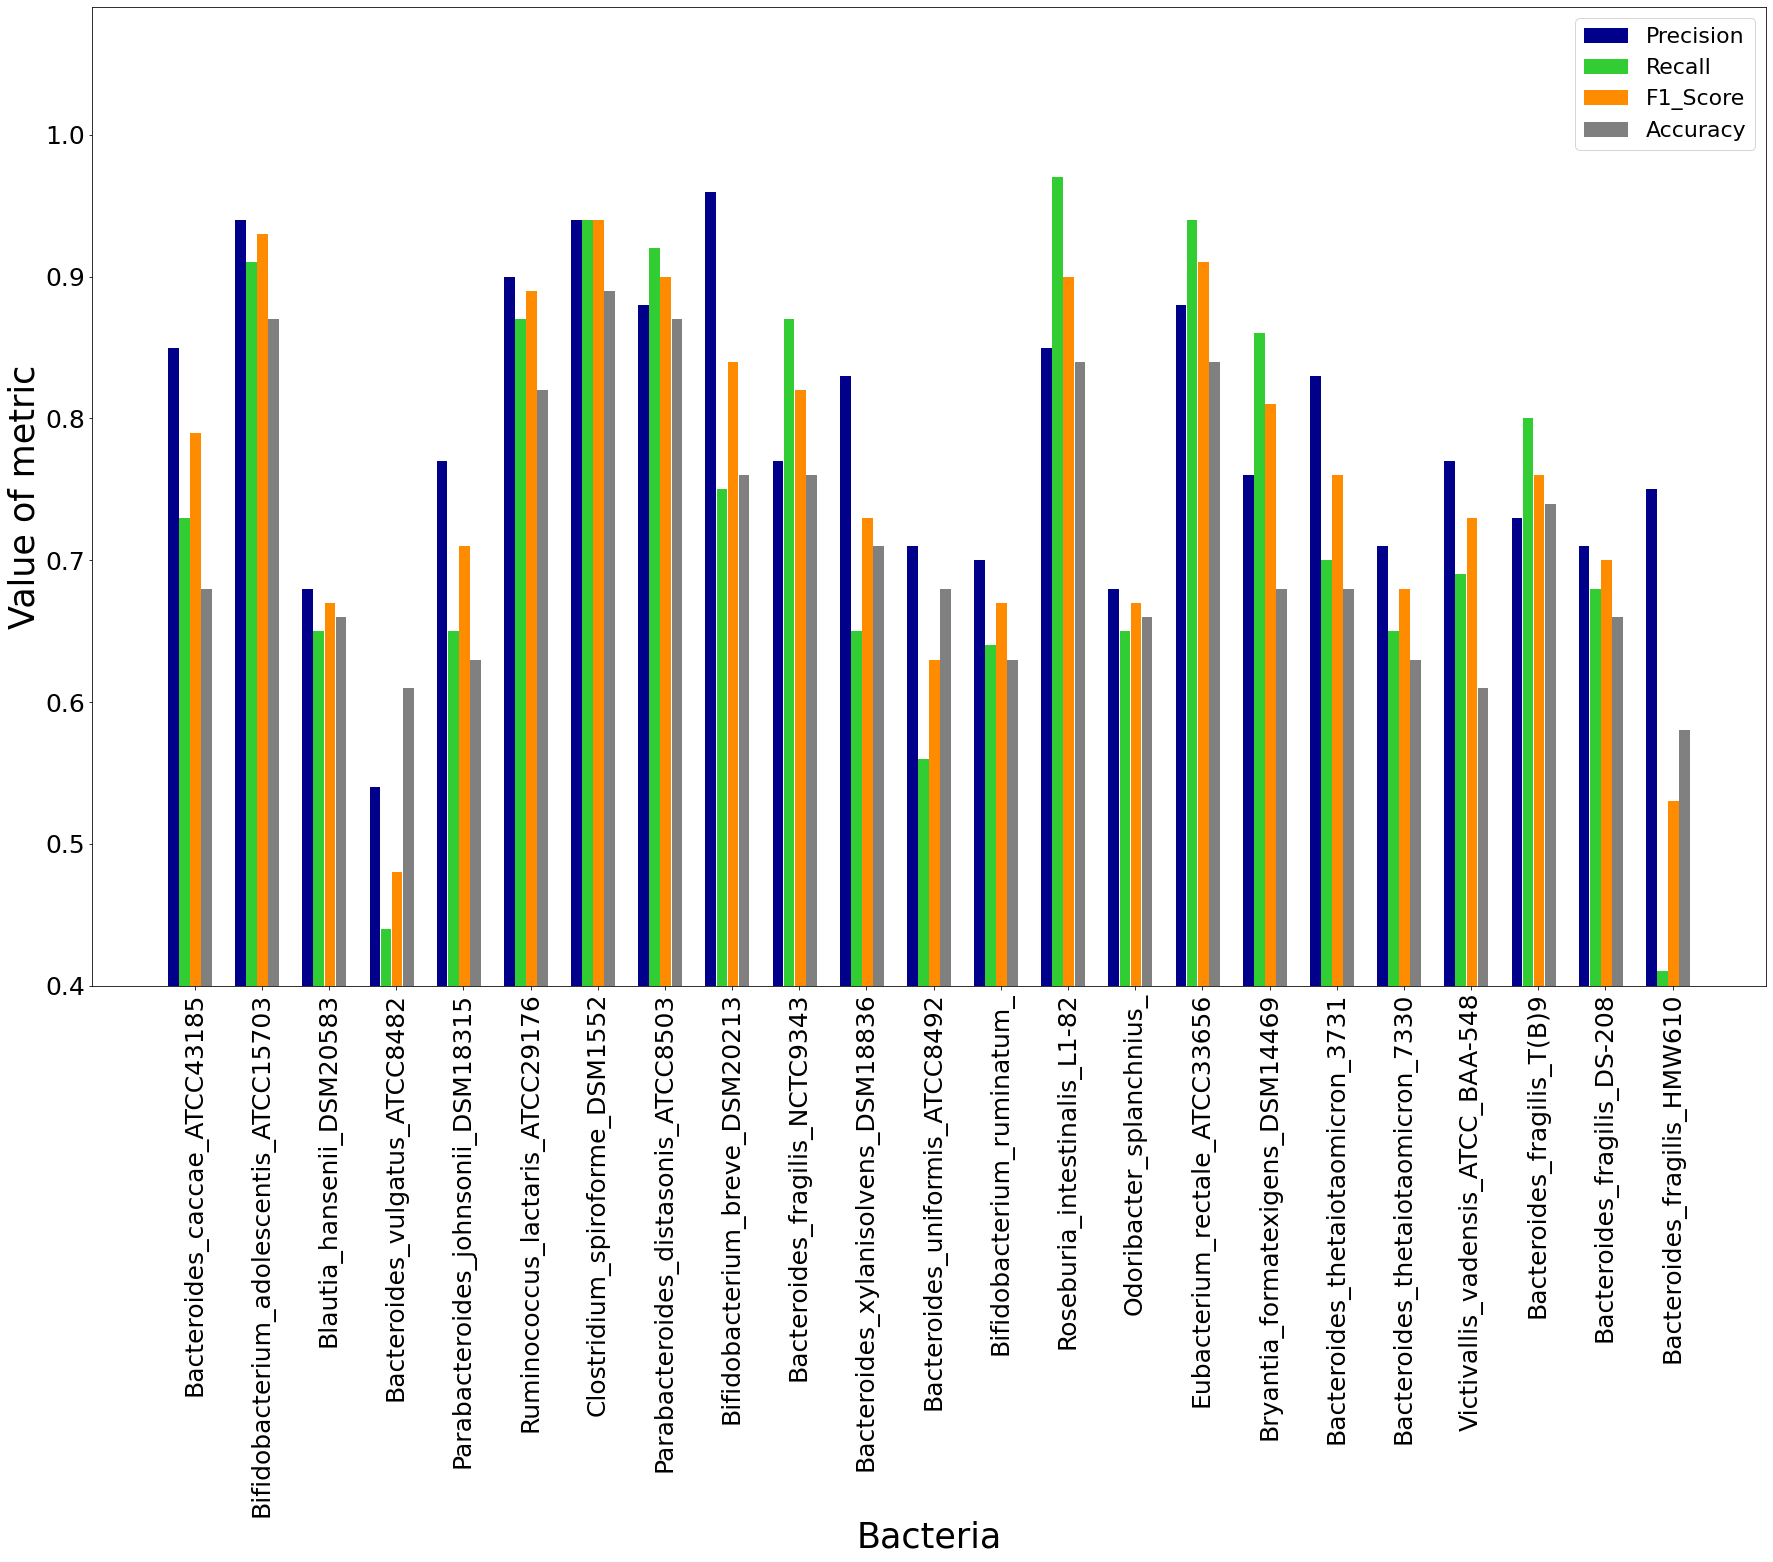

In [892]:
matric=fi_matric_2gen.reset_index(inplace = False,drop=True)

plt.figure(figsize=(30,18))
X_axis = np.arange(len(matric))
w=0.16
w1=0.005


num=4

WithGB = num*w + (num-1)*w1

#plt.bar(X_axis, matric['Precision'], width=w, label = 'Drug kill bacteria',align='center')
#plt.bar(X_axis+w1,matric['Recall'], width=w, label = 'Drug does not kill bacteria',align='center')
#plt.bar(X_axis+w1*2,matric['F1_Score'], width=w, label = 'Drug does not kill bacteria',align='center') 
#plt.bar(X_axis+w1*3,matric['test_roc_auc'], width=w, label = 'Drug does not kill bacteria',align='center')    

plt.bar(X_axis-w1/2 + (w+w1)*1, matric['Precision'], width=w, label = 'Precision',align='center',color='darkblue')
plt.bar(X_axis-w1/2 + (w+w1)*2,matric['Recall'], width=w, label = 'Recall',align='center',color='limegreen')
plt.bar(X_axis-w1/2 + (w+w1)*3,matric['F1_Score'], width=w, label = 'F1_Score',align='center',color='darkorange') 
plt.bar(X_axis-w1/2 + (w+w1)*4,matric['Accuracy'], width=w, label = 'Accuracy',align='center',color='gray')  


plt.xticks(X_axis+w*3, matric['Bacteria'],fontsize=25)
plt.yticks(fontsize=25)
plt.xticks(rotation = 90)
plt.xlabel("Bacteria",fontsize=35)
plt.ylabel("Value of metric",fontsize=35)
plt.ylim((0.4,1.09))
#plt.title("Number of Students in each group")
plt.legend(fontsize=22)
plt.grid(None)
plt.grid(None)
plt.savefig('matric_m.eps',bbox_inches='tight',dpi=400)
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


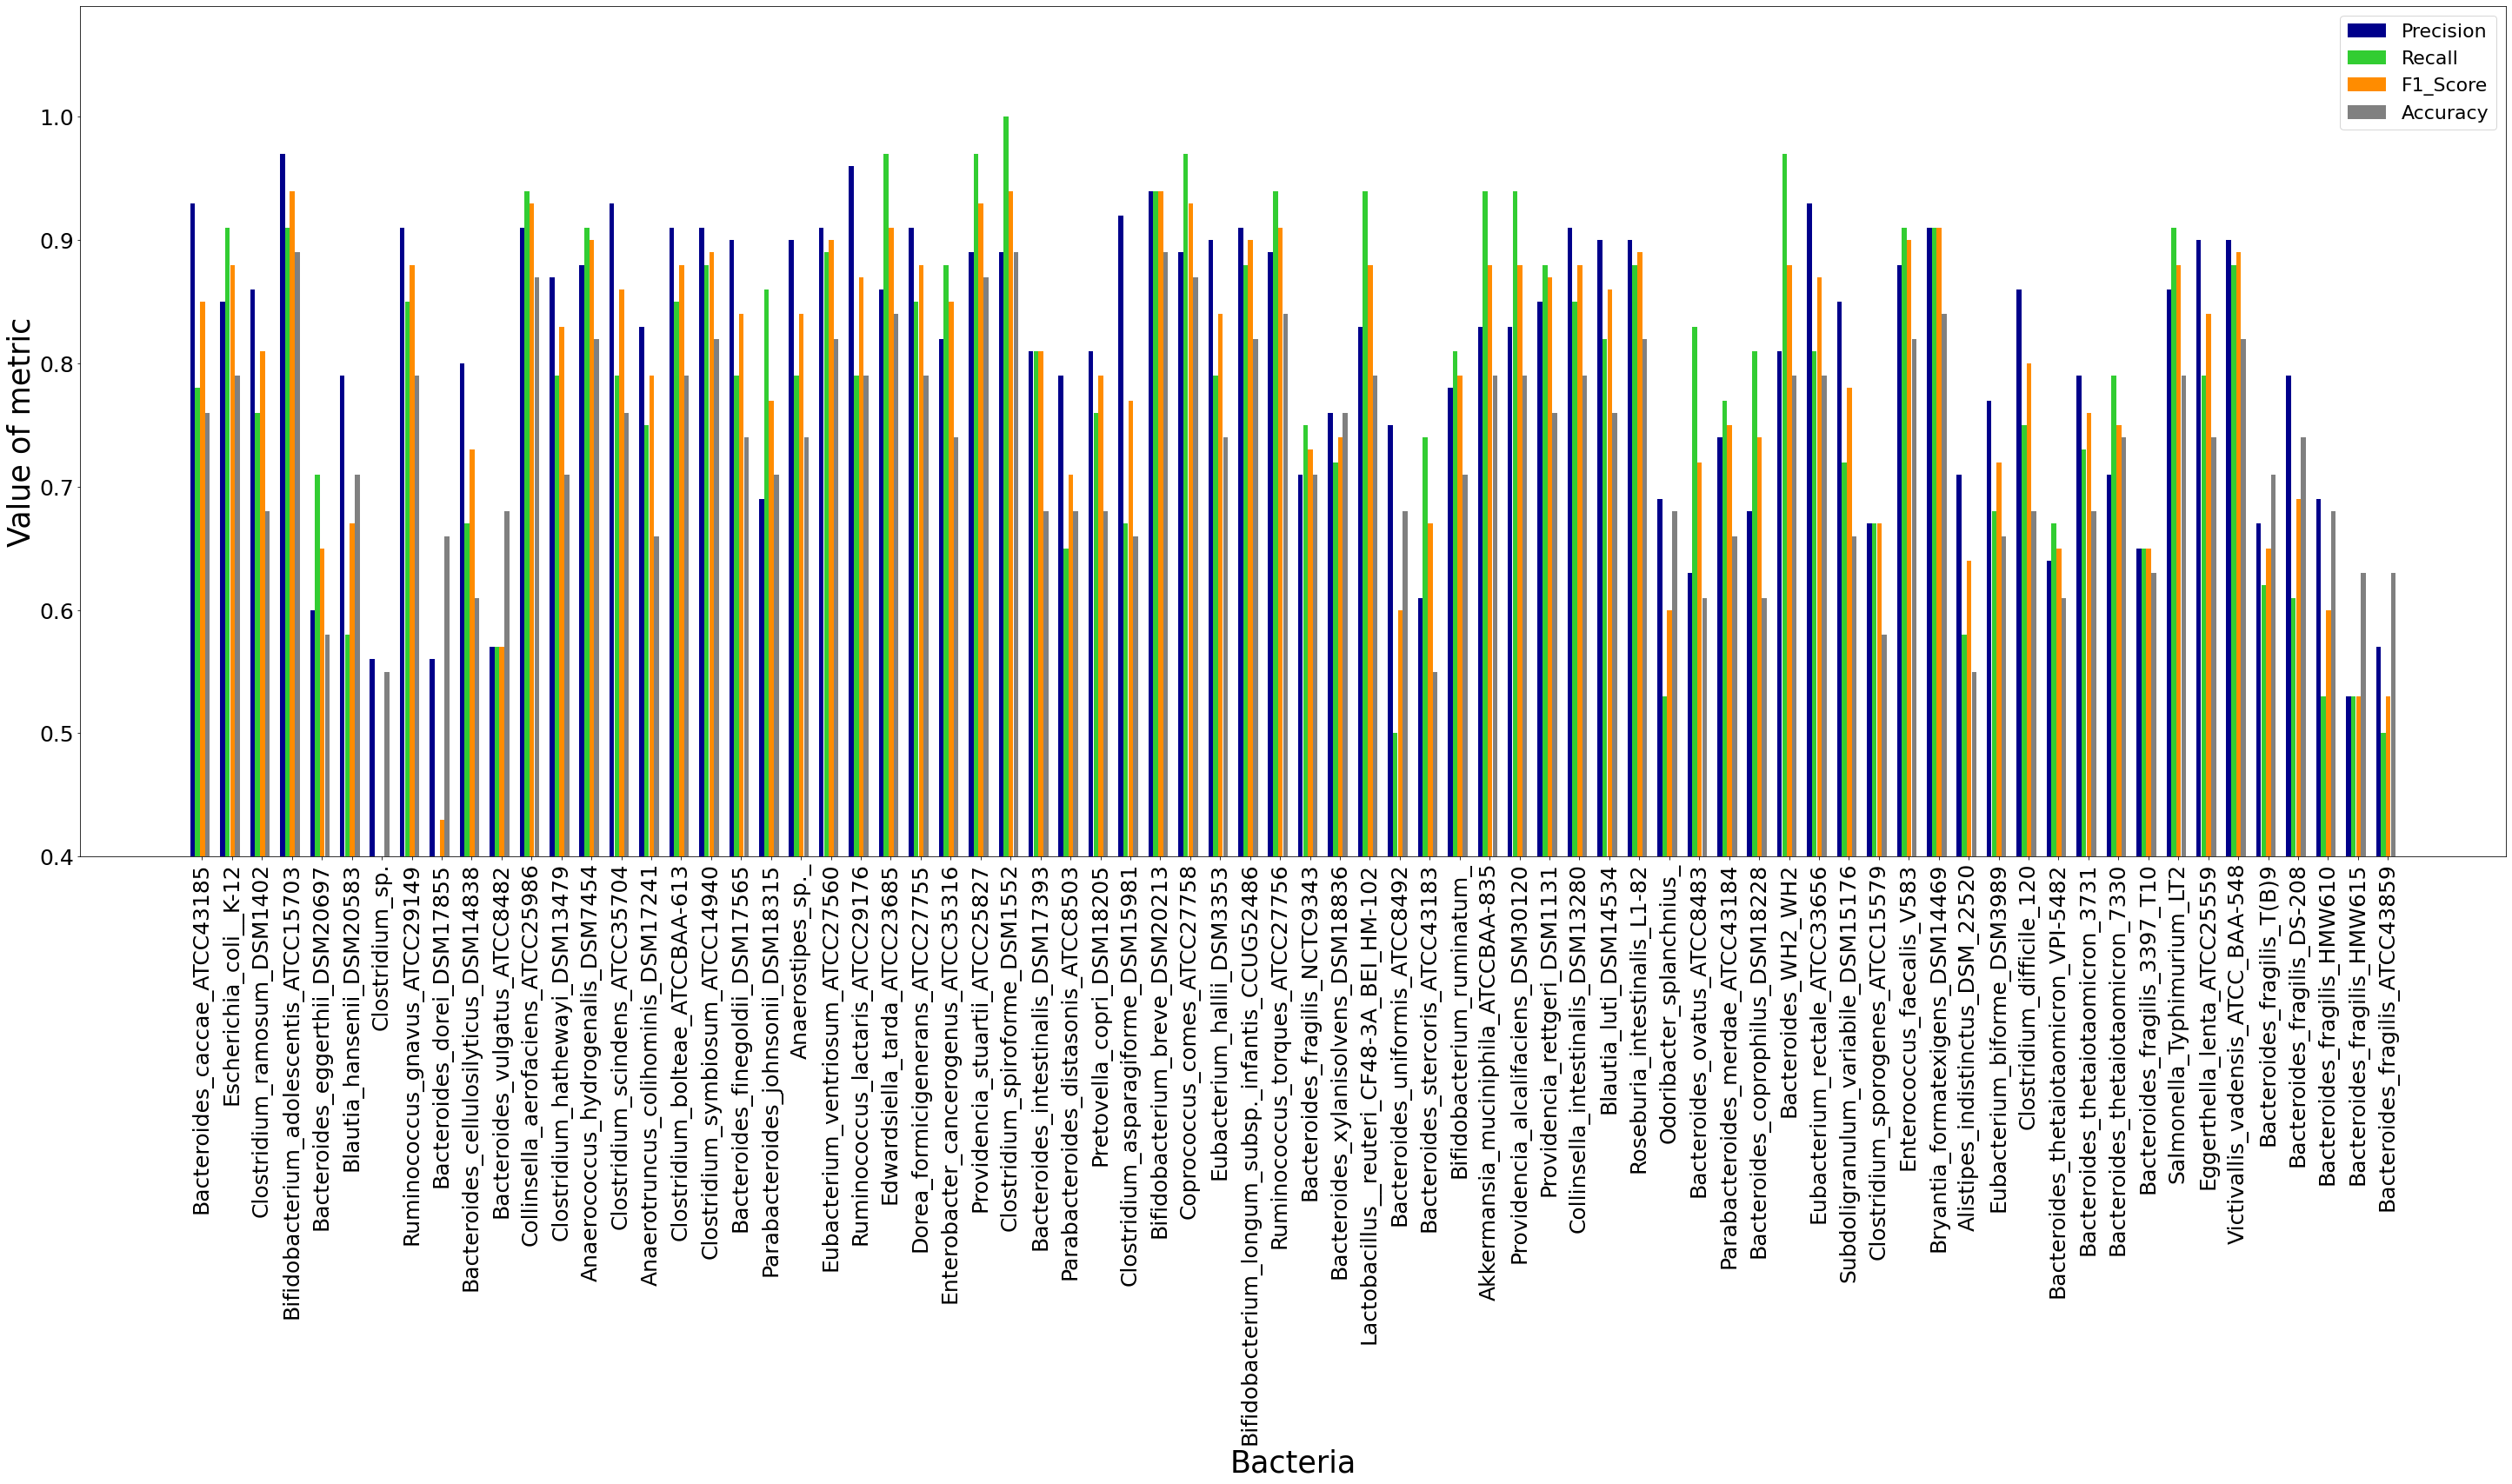

In [893]:
matric_gen1=fi_matric_1gen.reset_index(inplace = False,drop=True)


plt.figure(figsize=(50,18))
X_axis = np.arange(len(matric_gen1))
w=0.16
w1=0.005


num=4

WithGB = num*w + (num-1)*w1

#plt.bar(X_axis, matric['Precision'], width=w, label = 'Drug kill bacteria',align='center')
#plt.bar(X_axis+w1,matric['Recall'], width=w, label = 'Drug does not kill bacteria',align='center')
#plt.bar(X_axis+w1*2,matric['F1_Score'], width=w, label = 'Drug does not kill bacteria',align='center') 
#plt.bar(X_axis+w1*3,matric['test_roc_auc'], width=w, label = 'Drug does not kill bacteria',align='center')    

plt.bar(X_axis-w1/2 + (w+w1)*1, matric_gen1['Precision'], width=w, label = 'Precision',align='center',color='darkblue')
plt.bar(X_axis-w1/2 + (w+w1)*2,matric_gen1['Recall'], width=w, label = 'Recall',align='center',color='limegreen')
plt.bar(X_axis-w1/2 + (w+w1)*3,matric_gen1['F1_Score'], width=w, label = 'F1_Score',align='center',color='darkorange') 
plt.bar(X_axis-w1/2 + (w+w1)*4,matric_gen1['Accuracy'], width=w, label = 'Accuracy',align='center',color='gray')  


plt.xticks(X_axis+w*3, matric_gen1['Bacteria'],fontsize=25)
plt.yticks(fontsize=25)
plt.xticks(rotation = 90)
plt.xlabel("Bacteria",fontsize=35)
plt.ylabel("Value of metric",fontsize=35)
plt.ylim((0.4,1.09))
#plt.title("Number of Students in each group")
plt.legend(fontsize=22)
plt.grid(None)
plt.grid(None)
plt.savefig('matric_gen1_m.eps',bbox_inches='tight',dpi=400)
plt.show()

##  Matric error bar plot

In [894]:
fi_matric_1gen.reset_index(drop=True)
fi_matric_2gen.reset_index(drop=True)

Bacteria Accuracy Precision Recall F1_Score
0             Bacteroides_caccae_ATCC43185     0.68      0.85   0.73     0.79
1   Bifidobacterium_adolescentis_ATCC15703     0.87      0.94   0.91     0.93
2                Blautia_hansenii_DSM20583     0.66      0.68   0.65     0.67
3            Bacteroides_vulgatus_ATCC8482     0.61      0.54   0.44     0.48
4       Parabacteroides_johnsonii_DSM18315     0.63      0.77   0.65     0.71
5          Ruminococcus_lactaris_ATCC29176     0.82       0.9   0.87     0.89
6           Clostridium_spiroforme_DSM1552     0.89      0.94   0.94     0.94
7      Parabacteroides_distasonis_ATCC8503     0.87      0.88   0.92      0.9
8           Bifidobacterium_breve_DSM20213     0.76      0.96   0.75     0.84
9            Bacteroides_fragilis_NCTC9343     0.76      0.77   0.87     0.82
10      Bacteroides_xylanisolvens_DSM18836     0.71      0.83   0.65     0.73
11          Bacteroides_uniformis_ATCC8492     0.68      0.71   0.56     0.63
12              Bifidobacterium_ruminatum_     0.63       0.7   0.64     0.67
13            Roseburia_intestinalis_L1-82     0.84      0.85   0.97      0.9
14                Odoribacter_splanchnius_     0.66      0.68   0.65     0.67
15           Eubacterium_rectale_ATCC33656     0.84      0.88   0.94     0.91
16         Bryantia_formatexigens_DSM14469     0.68      0.76   0.86     0.81
17       Bacteroides_thetaiotaomicron_3731     0.68      0.83    0.7     0.76
18       Bacteroides_thetaiotaomicron_7330     0.63      0.71   0.65     0.68
19       Victivallis_vadensis_ATCC_BAA-548     0.61      0.77   0.69     0.73
20              Bacteroides_fragilis_T(B)9     0.74      0.73    0.8     0.76
21             Bacteroides_fragilis_DS-208     0.66      0.71   0.68      0.7
22             Bacteroides_fragilis_HMW610     0.58      0.75   0.41     0.53

In [895]:
# Calculate the average
Accuracy_mean = np.mean(fi_matric_2gen['Accuracy'])
Precision_mean = np.mean(fi_matric_2gen['Precision'])
Recall_mean = np.mean(fi_matric_2gen['Recall'])
F1_Score_mean = np.mean(fi_matric_2gen['F1_Score'])

In [896]:
Accuracy_std = np.std(fi_matric_2gen['Accuracy'])
Precision_std = np.std(fi_matric_2gen['Precision'])
Recall_std = np.std(fi_matric_2gen['Recall'])
F1_Score_std = np.std(fi_matric_2gen['F1_Score'])

In [897]:
# Create lists for the plot
materials = ['Accuracy','Precision','Recall','F1_Score']
x_pos = np.arange(len(materials))
CTEs = [Accuracy_mean,Precision_mean,Recall_mean,F1_Score_mean]
error = [Accuracy_std,Precision_std,Recall_std,F1_Score_std]

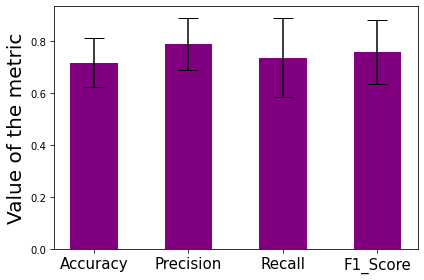

In [898]:
# Build the plot
#fig=plt.figure(figsize=(50,15))
fig, ax = plt.subplots(figsize=(6,4))

ax.bar(x_pos, CTEs, yerr=error, align='center', alpha=1, width=0.5,ecolor='black', capsize=10,color='purple')
ax.set_ylabel('Value of the metric',fontsize=20)
ax.set_xticks(x_pos)
tick_size = 10

ax.tick_params(size=4)
ax.set_xticklabels(materials,fontsize=15)
#ax.set_title('Coefficent of Thermal Expansion (CTE) of Three Metals')
ax.yaxis.grid(False)

# Save the figure and show
plt.tight_layout()
plt.savefig('fi_matric_2gen_error_m.eps')
plt.show()

## FDA data plot

In [899]:
fmt[:]=np.where(fmt > 20,0,1)

In [900]:
fmt

Bacteroides_caccae_ATCC43185  Bifidobacterium_adolescentis_ATCC15703  \
0                                1                                       1   
1                                0                                       1   
2                                1                                       1   
3                                1                                       1   
4                                0                                       1   
...                            ...                                     ...   
1169                             0                                       1   
1170                             1                                       1   
1171                             0                                       1   
1172                             1                                       1   
1173                             1                                       1   

      Blautia_hansenii_DSM20583  Bacteroides_vulgatus_ATCC8482  \
0                             1                              0   
1                             0                              1   
2                             1                              0   
3                             1                              1   
4                             0                              0   
...                         ...                            ...   
1169                          0                              0   
1170                          0                              1   
1171                          0                              0   
1172                          1                              0   
1173                          0                              1   

      Parabacteroides_johnsonii_DSM18315  Ruminococcus_lactaris_ATCC29176  \
0                                      0                                1   
1                                      0                                0   
2                                      1                                1   
3                                      1                                1   
4                                      0                                1   
...                                  ...                              ...   
1169                                   1                                1   
1170                                   1                                1   
1171                                   1                                1   
1172                                   1                                1   
1173                                   1                                1   

      Clostridium_spiroforme_DSM1552  Parabacteroides_distasonis_ATCC8503  \
0                                  1                                    0   
1                                  1                                    1   
2                                  1                                    1   
3                                  1                                    1   
4                                  1                                    0   
...                              ...                                  ...   
1169                               0                                    0   
1170                               1                                    0   
1171                               0                                    0   
1172                               1                                    0   
1173                               1                                    0   

      Bifidobacterium_breve_DSM20213  Bacteroides_fragilis_NCTC9343  ...  \
0                                  0                              1  ...   
1                                  1                              1  ...   
2                                  1                              1  ...   
3                                  1                              1  ...   
4                                  1          

In [901]:
fmt['meta_bacteria'] = fmt.eq(0).sum(axis=1)

In [902]:
mt_status_f=fda_test['status']

s_f= mt_status_f.reset_index(drop=True).to_frame()

s_f['status']

s_f = mt_status_f.reset_index(drop=True).to_frame()

s_f

status
0     accepted
1     accepted
2     accepted
3     accepted
4     accepted
...        ...
1169  rejected
1170  rejected
1171  rejected
1172  rejected
1173  rejected

[1174 rows x 1 columns]

In [903]:
fmt_f = pd.concat([fmt,s_f], axis=1)

In [904]:
fmt_f['index'] = fmt_f.index

In [905]:
fmt_f

Bacteroides_caccae_ATCC43185  Bifidobacterium_adolescentis_ATCC15703  \
0                                1                                       1   
1                                0                                       1   
2                                1                                       1   
3                                1                                       1   
4                                0                                       1   
...                            ...                                     ...   
1169                             0                                       1   
1170                             1                                       1   
1171                             0                                       1   
1172                             1                                       1   
1173                             1                                       1   

      Blautia_hansenii_DSM20583  Bacteroides_vulgatus_ATCC8482  \
0                             1                              0   
1                             0                              1   
2                             1                              0   
3                             1                              1   
4                             0                              0   
...                         ...                            ...   
1169                          0                              0   
1170                          0                              1   
1171                          0                              0   
1172                          1                              0   
1173                          0                              1   

      Parabacteroides_johnsonii_DSM18315  Ruminococcus_lactaris_ATCC29176  \
0                                      0                                1   
1                                      0                                0   
2                                      1                                1   
3                                      1                                1   
4                                      0                                1   
...                                  ...                              ...   
1169                                   1                                1   
1170                                   1                                1   
1171                                   1                                1   
1172                                   1                                1   
1173                                   1                                1   

      Clostridium_spiroforme_DSM1552  Parabacteroides_distasonis_ATCC8503  \
0                                  1                                    0   
1                                  1                                    1   
2                                  1                                    1   
3                                  1                                    1   
4                                  1                                    0   
...                              ...                                  ...   
1169                               0                                    0   
1170                               1                                    0   
1171                               0                                    0   
1172                               1                                    0   
1173                               1                                    0   

      Bifidobacterium_breve_DSM20213  Bacteroides_fragilis_NCTC9343  ...  \
0                                  0                              1  ...   
1                                  1                              1  ...   
2                                  1                              1  ...   
3                                  1                              1  ...   
4                                  1          

In [906]:
md1=fmt_f.loc[:,'meta_bacteria':'status']

In [907]:
md1

meta_bacteria    status
0                11  accepted
1                 7  accepted
2                 1  accepted
3                 1  accepted
4                12  accepted
...             ...       ...
1169             16  rejected
1170              9  rejected
1171             11  rejected
1172             11  rejected
1173              8  rejected

[1174 rows x 2 columns]

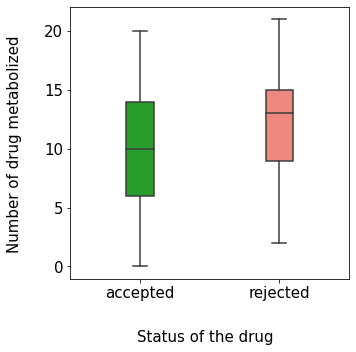

In [908]:
row=1
col=1
i=0
fig,ax=plt.subplots(row,col,figsize=(5,5),sharex=True, sharey=True)
#palette = [ 'b', 'r']
my_pal = {"rejected": "#FF796C", "accepted": "#15B01A"}
sns.boxplot(data=md1, x="status", y="meta_bacteria",width=0.2,palette=my_pal)
plt.ylabel("",fontsize=15)
plt.xlabel("",fontsize=15)
ax.tick_params(labelsize=15)
fig.text(0.5, -0.05, 'Status of the drug', ha='center',fontsize=15)
fig.text(-0.05, 0.5, 'Number of drug metabolized', va='center', rotation='vertical',fontsize=15)  
plt.savefig("fda_meta.eps",bbox_inches='tight')


In [909]:
md1.to_csv('../../analysis/meta_fda.csv', index=True)

[6 5 3 2 1 1 1 1 1 1 1 1]


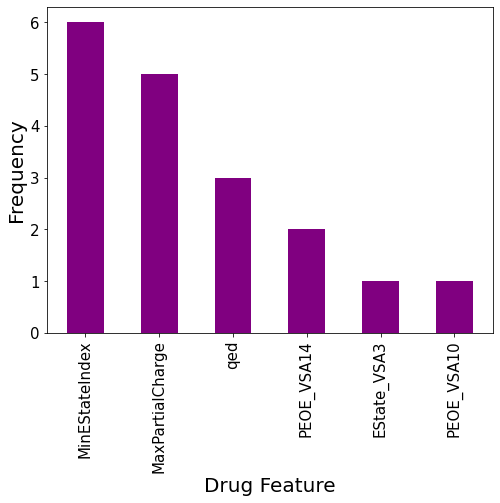

In [910]:
categories = df_fi_2gen['column_name'].value_counts().index
counts = df_fi_2gen['column_name'].value_counts().values
print(counts)
fig=plt.figure(figsize=(8,6))
plt.bar(categories[0:6], counts[0:6], width=0.5,color='purple')
plt.xticks(rotation=90, fontsize=15)
plt.yticks(rotation=0, fontsize=15)

plt.ylabel("Frequency",fontsize=20)
plt.xlabel("Drug Feature",fontsize=20)
plt.savefig('im_fe_m2gen.eps',bbox_inches='tight')

plt.show()

In [911]:
categories

Index(['MinEStateIndex', 'MaxPartialCharge', 'qed', 'PEOE_VSA14',
       'EState_VSA3', 'PEOE_VSA10', 'VSA_EState5', 'BCUT2D_MWHI',
       'VSA_EState4', 'PEOE_VSA1', 'SlogP_VSA3', 'TPSA'],
      dtype='object')